In [1]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [3]:
import netCDF4 as nc
# import sys
# sys.path.append('/data/tjarniko/mocsy')
# import mocsy
import numpy as np

#import gsw
import arrow
import glob
import cmocean as cm
import matplotlib.pyplot as plt

from salishsea_tools import (
    nc_tools,
    viz_tools,
    geo_tools,
    tidetools
)

%matplotlib inline

## Adapted from notebook for Evie

#### TJSJ let's make a dict with placenames, colors, and then code a map to visualise the stations

In [4]:
PLACES = {
'Deep Bay': {
    
'lon lat': (-124.7392, 49.4606),

'color': 'red', 'NEMO grid ji': (599, 126),

},

'Southern Baynes': {

'lon lat': (-124.7457, 49.4760),

'color': 'sienna', 'NEMO grid ji': (602, 127),

},

'Northern Baynes': {

'lon lat': (-124.8924, 49.6492),

'color': 'orange', 'NEMO grid ji': (646, 127),

},

'Fanny Bay': {

'lon lat': (-124.8227, 49.5086),

'color': 'gold', 'NEMO grid ji': (614, 120),

},

'Maple Bay': {

'lon lat': (-123.5947, 48.8140),

'color': 'olivedrab', 'NEMO grid ji': (392, 213),

},

'Salt Spring': {

'lon lat': (-123.5513, 48.7993),

'color': 'lightgreen', 'NEMO grid ji': (386, 218),

},

'Nanoose Bay': {

'lon lat': (-124.1359, 49.2609),

'color': 'turquoise', 'NEMO grid ji': (517, 190),

},

'Lasqueti Island': {

# deg E, deg N

'lon lat': (-124.3384, 49.5442),

'color': 'dodgerblue', 'NEMO grid ji': (586, 195),

},

'Main SoG': {

'lon lat': (-123.5832, 49.1177),

'color': 'slategray', 'NEMO grid ji': (450, 253),

},

'Cortes/Marina': {

'lon lat': (-125.0194, 50.0418),

'color': 'royalblue', 'NEMO grid ji': (732, 157),

},

'Lund/Desolation Sound': {

'lon lat': (-124.7666, 49.9804),

'color': 'darkviolet', 'NEMO grid ji': (702, 187),

},

'Mouth of Okeover': {

'lon lat': (-124.8174, 50.0805),

'color': 'pink', 'NEMO grid ji': (726, 192),

},
}

list_places = ['Deep Bay', 'Southern Baynes', 'Northern Baynes', \
               'Fanny Bay', 'Maple Bay', 'Salt Spring', 'Nanoose Bay',\
               'Lasqueti Island', 'Main SoG', 'Cortes/Marina', \
               'Lund/Desolation Sound', 'Mouth of Okeover']

#### map plotting code

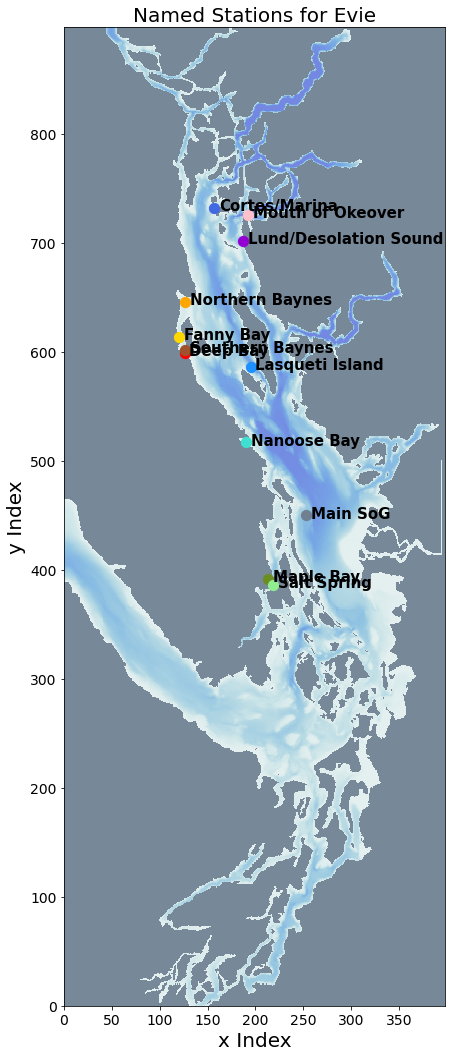

In [5]:
bath = nc.Dataset('/data/tjarniko/MEOPAR/grid/bathymetry_201702.nc')
bath1 = bath.variables['Bathymetry']

def wshed_plot(surfdat_1,tit1,t_cmap,xsize,ysize,v_min1,v_max1,cl1,bigtit):

    fig, ax = plt.subplots(1, 1, figsize=(xsize, ysize), sharey=True)
    cmap = t_cmap
            

    tplt = np.ma.masked_values(surfdat_1,0)
    ax.set_title(tit1,fontsize = 20 )
    v_min = v_min1
    v_max = v_max1
    clabel = cl1

    viz_tools.set_aspect(ax)
    mesh = ax.pcolormesh(tplt, cmap=t_cmap, vmin=v_min, vmax=v_max) 
    ax.set_xlabel('x Index', fontsize = 20 )
    ax.set_ylabel('y Index', fontsize = 20 )
    
    for i in range(0,len(list_places)):
        t_place = list_places[i]
        tj = PLACES[t_place]['NEMO grid ji'][1]
        ti = PLACES[t_place]['NEMO grid ji'][0]
        col = PLACES[t_place]['color']
        pts = ax.scatter(tj,ti,s=105,c=col,marker='o')
        ax.text(tj+5,ti-2,t_place, weight = 'bold', fontsize = 15)

    plt.xlim([0,398])
    plt.ylim([0,898])
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    cmap.set_bad('lightslategray')
    plt.suptitle(bigtit,fontsize=20)
    
fact = 0.6
wshed_plot(bath1,'Named Stations for Evie', \
               cm.cm.dense,20*fact,30*fact,0,1000,'bathymetry','')

## Plots of pH, OmA, and OmC for a given year for all stations

In [6]:
t_year = '2014'
filename = './EXTRACTED_timeseries/pHOm_timeseries_' + t_year + '.nc'
t_nc = nc.Dataset(filename)

## Making Debby's meshes

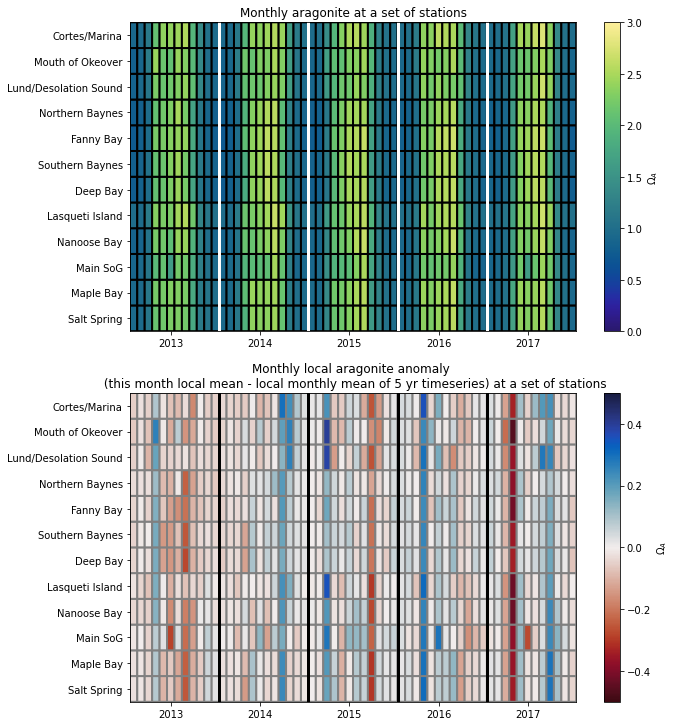

In [19]:

list_places = ['Salt Spring','Maple Bay','Main SoG',\
              'Nanoose Bay','Lasqueti Island', 'Deep Bay', \
               'Southern Baynes','Fanny Bay', 'Northern Baynes', \
              'Lund/Desolation Sound','Mouth of Okeover','Cortes/Marina',]

t_nc2013 = nc.Dataset('./EXTRACTED_timeseries/pHOm_timeseries_2013.nc')
t_nc2014 = nc.Dataset('./EXTRACTED_timeseries/pHOm_timeseries_2014.nc')
t_nc2015 = nc.Dataset('./EXTRACTED_timeseries/pHOm_timeseries_2015.nc')
t_nc2016 = nc.Dataset('./EXTRACTED_timeseries/pHOm_timeseries_2016.nc')
t_nc2017 = nc.Dataset('./EXTRACTED_timeseries/pHOm_timeseries_2017.nc')

ncs = [t_nc2013,t_nc2014,t_nc2015,t_nc2016,t_nc2017]


months_norm = np.array([1,32,60,91,121,152,182,\
                       213,244,274,305,335,366])
months_py = months_norm-1

months_leap = np.array([1,32,61,92,122,153,183,\
                        214,245,275,306,336,367])
months_py_leap = months_leap-1

Oma_mat_mon = np.zeros([12,60])

#stations
for s in range(0,12):
    monthly = np.zeros(60)
    place = list_places[s]

    count = 0
    #ncs
    for n in range(0,5):
        t_nc = ncs[n]
        ## surface Omega
        toex = t_nc[place]['OmA_timeseries'][0,:]
        #months
        for m in range(0,12):
            if n!=3:
                monmean =  np.nanmean(toex[months_py[m]:months_py[m+1]])
            if n==3:
                monmean =  np.nanmean(toex[months_py_leap[m]:months_py_leap[m+1]])
                                
                
            monthly[count] = monmean
            count = count+1
    Oma_mat_mon[s,:] = monthly

#anomalies
Oma_mat_mon_anom = np.zeros_like(Oma_mat_mon)

for i in range(0,12):
    tmon = Oma_mat_mon[i,:]
    
    for m in range(0,12):
        tind = np.arange(m,m+12*5,12)
#         print(tind)
        monthly_mean = np.nanmean(tmon[tind])
#         print(monthly_mean)
        for t in range(0,5):
            ind = tind[t]
            Oma_mat_mon_anom[i,ind] = Oma_mat_mon[i,ind] - monthly_mean

fact = 0.5
fig, axs = plt.subplots(2,1, figsize=(20*fact, 25*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()

c = axs[0].pcolor(Oma_mat_mon,edgecolors='k', \
                  vmin = 0, vmax = 3,\
                  linewidths=2, cmap = cm.cm.haline)

axs[0].set_yticks(np.arange(0.5,12.5,1))
axs[0].set_xticks(np.arange(5.5,65.5,12))
axs[0].set_xticklabels(np.arange(2013,2018,1))
axs[0].set_title('Monthly aragonite at a set of stations')
axs[0].axvline(x = 12, color = 'white',linewidth = 3)
axs[0].axvline(x = 24, color = 'white',linewidth = 3)
axs[0].axvline(x = 36, color = 'white',linewidth = 3)
axs[0].axvline(x = 48, color = 'white', linewidth = 3)

w = axs[0].set_yticklabels(['Salt Spring','Maple Bay','Main SoG',\
              'Nanoose Bay','Lasqueti Island', 'Deep Bay', \
               'Southern Baynes','Fanny Bay', 'Northern Baynes', \
              'Lund/Desolation Sound','Mouth of Okeover','Cortes/Marina'])
fig.colorbar(c, ax=axs[0], label = '$\Omega_A$')

##

c = axs[1].pcolor(Oma_mat_mon_anom,edgecolors='grey', \
                  vmin = -0.5, vmax = 0.5,\
                  linewidths=2, cmap = cm.cm.balance_r)

axs[1].set_yticks(np.arange(0.5,12.5,1))
axs[1].set_xticks(np.arange(5.5,65.5,12))
axs[1].set_xticklabels(np.arange(2013,2018,1))
axs[1].set_title('Monthly local aragonite anomaly \n (this month local mean - local monthly mean of 5 yr timeseries) at a set of stations')
axs[1].axvline(x = 12, color = 'k',linewidth = 3)
axs[1].axvline(x = 24, color = 'k',linewidth = 3)
axs[1].axvline(x = 36, color = 'k',linewidth = 3)
axs[1].axvline(x = 48, color = 'k', linewidth = 3)

w = axs[1].set_yticklabels(['Salt Spring','Maple Bay','Main SoG',\
              'Nanoose Bay','Lasqueti Island', 'Deep Bay', \
               'Southern Baynes','Fanny Bay', 'Northern Baynes', \
              'Lund/Desolation Sound','Mouth of Okeover','Cortes/Marina'])
fig.colorbar(c, ax=axs[1], label = '$\Omega_A$')

## twomonthly

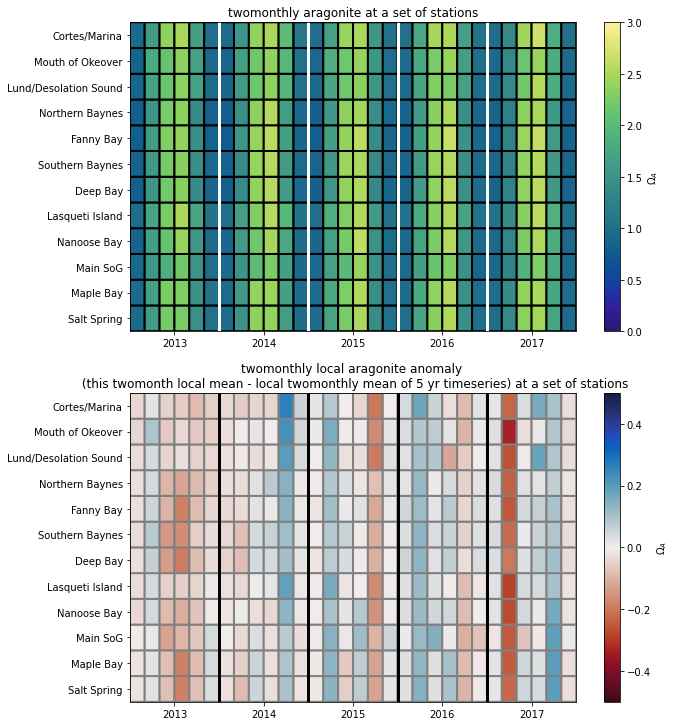

In [20]:
twomonths_norm = np.array([1,60,121,182,\
                       244,305,366])
twomonths_py = twomonths_norm-1

twomonths_leap = np.array([1,61,122,183,\
                        245,306,367])
twomonths_py_leap = twomonths_leap-1

noseg = 30

Oma_mat_twomon = np.zeros([12,noseg])

#stations
for s in range(0,12): # s is place
    twomonthly = np.zeros(noseg)
    place = list_places[s]

    count = 0
    #ncs
    for n in range(0,5): #n is year
        t_nc = ncs[n]
        ## surface Omega
        toex = t_nc[place]['OmA_timeseries'][0,:]
        #twomonths 
        for m in range(0,6): # m is month
            if n!=3:
                twomonmean =  np.nanmean(toex[twomonths_py[m]:twomonths_py[m+1]])
            if n==3:
                twomonmean =  np.nanmean(toex[twomonths_py_leap[m]:twomonths_py_leap[m+1]])
                                
                
            twomonthly[count] = twomonmean
            count = count+1
    Oma_mat_twomon[s,:] = twomonthly

#anomalies
Oma_mat_twomon_anom = np.zeros_like(Oma_mat_twomon)

for i in range(0,12):
    ttwomon = Oma_mat_twomon[i,:]
    
    for m in range(0,6):
        tind = np.arange(m,m+6*5,6)
#         print(tind)
        twomonthly_mean = np.nanmean(ttwomon[tind])
#         print(twomonthly_mean)
        for t in range(0,5):
            ind = tind[t]
            Oma_mat_twomon_anom[i,ind] = Oma_mat_twomon[i,ind] - twomonthly_mean
            

fact = 0.5
fig, axs = plt.subplots(2,1, figsize=(20*fact, 25*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()

c = axs[0].pcolor(Oma_mat_twomon,edgecolors='k', \
                  vmin = 0, vmax = 3,\
                  linewidths=2, cmap = cm.cm.haline)

axs[0].set_yticks(np.arange(0.5,12.5,1))
axs[0].set_xticks(np.arange(3,33,6))
axs[0].set_xticklabels(np.arange(2013,2018,1))
axs[0].set_title('twomonthly aragonite at a set of stations')
axs[0].axvline(x = 12/2, color = 'white',linewidth = 3)
axs[0].axvline(x = 24/2, color = 'white',linewidth = 3)
axs[0].axvline(x = 36/2, color = 'white',linewidth = 3)
axs[0].axvline(x = 48/2, color = 'white', linewidth = 3)

w = axs[0].set_yticklabels(['Salt Spring','Maple Bay','Main SoG',\
              'Nanoose Bay','Lasqueti Island', 'Deep Bay', \
               'Southern Baynes','Fanny Bay', 'Northern Baynes', \
              'Lund/Desolation Sound','Mouth of Okeover','Cortes/Marina'])
fig.colorbar(c, ax=axs[0], label = '$\Omega_A$')

##

c = axs[1].pcolor(Oma_mat_twomon_anom,edgecolors='grey', \
                  vmin = -0.5, vmax = 0.5,\
                  linewidths=2, cmap = cm.cm.balance_r)

axs[1].set_yticks(np.arange(0.5,12.5,1))
axs[1].set_xticks(np.arange(3,33,6))
axs[1].set_xticklabels(np.arange(2013,2018,1))
axs[1].set_title('twomonthly local aragonite anomaly \n (this twomonth local mean - local twomonthly mean of 5 yr timeseries) at a set of stations')
axs[1].axvline(x = 12/2, color = 'black', linewidth = 3)
axs[1].axvline(x = 24/2, color = 'black', linewidth = 3)
axs[1].axvline(x = 36/2, color = 'black', linewidth = 3)
axs[1].axvline(x = 48/2, color = 'black', linewidth = 3)

w = axs[1].set_yticklabels(['Salt Spring','Maple Bay','Main SoG',\
              'Nanoose Bay','Lasqueti Island', 'Deep Bay', \
               'Southern Baynes','Fanny Bay', 'Northern Baynes', \
              'Lund/Desolation Sound','Mouth of Okeover','Cortes/Marina'])
fig.colorbar(c, ax=axs[1], label = '$\Omega_A$')


### Winter (prebloom) Jday 1-59
### Spring bloom – Jday 60-130 cite Allen and Wolf
### Productive season – Jday 131—mean(236,235,247,245,249) for end cite Moore-Maley and Allen
### Fall/end of year Jday 242(ish)-365
 
### Just an idea.  This idea has 4 instead of 5 seasons.
### Talk tomorrow-
### D.



In [21]:
print((236+235+247+245+249)/5)

242.4


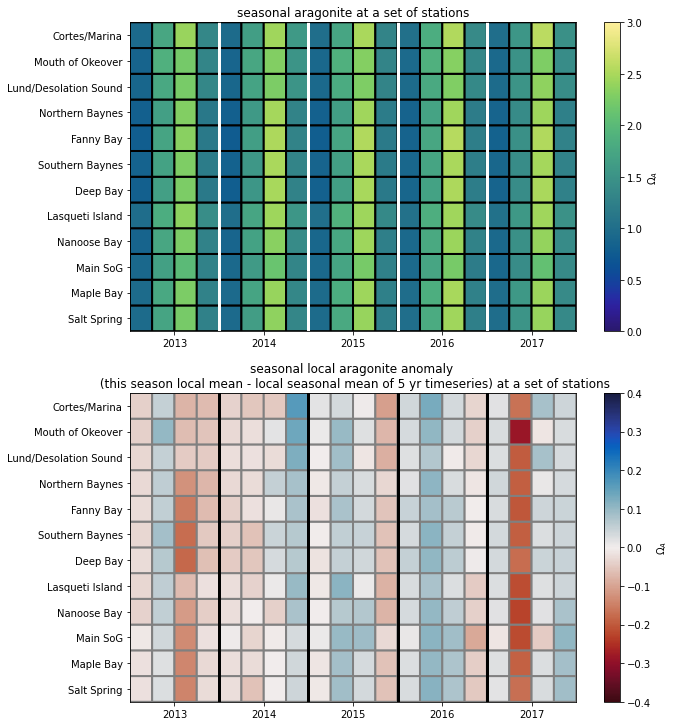

In [22]:

# Winter (prebloom) Jday 1-59
# Spring bloom – Jday 60-130 cite Allen and Wolf
# Productive season – Jday 131—mean(236,235,247,245,249) for end cite Moore-Maley and Allen
# Fall/end of year Jday 242(ish)-365
 
# Just an idea.  This idea has 4 instead of 5 seasons.
# Talk tomorrow-
# D.


seasths_norm = np.array([1,60,131,242,366])
seasths_py = seasths_norm-1

seasths_leap = np.array([1,61,132,243,367])
seasths_py_leap = seasths_leap-1

noseg = 20

Oma_mat_seas = np.zeros([12,noseg])

#stations
for s in range(0,12): # s is place
    seasthly = np.zeros(noseg)
    place = list_places[s]

    count = 0
    #ncs
    for n in range(0,5): #n is year
        t_nc = ncs[n]
        ## surface Omega
        toex = t_nc[place]['OmA_timeseries'][0,:]
        #seasths 
        for m in range(0,4): # m is month
            if n!=3:
                seasmean =  np.nanmean(toex[seasths_py[m]:seasths_py[m+1]])
            if n==3:
                seasmean =  np.nanmean(toex[seasths_py_leap[m]:seasths_py_leap[m+1]])
                                
                
            seasthly[count] = seasmean
            count = count+1
    Oma_mat_seas[s,:] = seasthly

#anomalies
Oma_mat_seas_anom = np.zeros_like(Oma_mat_seas)

for i in range(0,12):
    tseas = Oma_mat_seas[i,:]
    
    for m in range(0,4):
        tind = np.arange(m,m+4*5,4)
#         print(tind)
        seasthly_mean = np.nanmean(tseas[tind])
#         print(seasthly_mean)
        for t in range(0,5):
            ind = tind[t]
            Oma_mat_seas_anom[i,ind] = Oma_mat_seas[i,ind] - seasthly_mean
            
            #list_places = ['Salt Spring','Maple Bay','Main SoG',\
#               'Nanoose Bay','Lasqueti Island', 'Deep Bay', \
#                'Southern Baynes','Fanny Bay', 'Northern Baynes', \
#               'Lund/Desolation Sound','Mouth of Okeover','Cortes/Marina',]


fact = 0.5
fig, axs = plt.subplots(2,1, figsize=(20*fact, 25*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()

c = axs[0].pcolor(Oma_mat_seas,edgecolors='k', \
                  vmin = 0, vmax = 3,\
                  linewidths=2, cmap = cm.cm.haline)

axs[0].set_yticks(np.arange(0.5,12.5,1))
axs[0].set_xticks(np.arange(2,22,4))
axs[0].set_xticklabels(np.arange(2013,2018,1))
axs[0].set_title('seasonal aragonite at a set of stations')
axs[0].axvline(x = 12/3, color = 'white',linewidth = 3)
axs[0].axvline(x = 24/3, color = 'white',linewidth = 3)
axs[0].axvline(x = 36/3, color = 'white',linewidth = 3)
axs[0].axvline(x = 48/3, color = 'white', linewidth = 3)

w = axs[0].set_yticklabels(['Salt Spring','Maple Bay','Main SoG',\
              'Nanoose Bay','Lasqueti Island', 'Deep Bay', \
               'Southern Baynes','Fanny Bay', 'Northern Baynes', \
              'Lund/Desolation Sound','Mouth of Okeover','Cortes/Marina'])
fig.colorbar(c, ax=axs[0], label = '$\Omega_A$')

##

c = axs[1].pcolor(Oma_mat_seas_anom,edgecolors='grey', \
                  vmin = -0.4, vmax = 0.4,\
                  linewidths=2, cmap = cm.cm.balance_r)

axs[1].set_yticks(np.arange(0.5,12.5,1))
axs[1].set_xticks(np.arange(2,22,4))
axs[1].set_xticklabels(np.arange(2013,2018,1))
axs[1].set_title('seasonal local aragonite anomaly \n (this season local mean - local seasonal mean of 5 yr timeseries) at a set of stations')
axs[1].axvline(x = 12/3, color = 'black', linewidth = 3)
axs[1].axvline(x = 24/3, color = 'black', linewidth = 3)
axs[1].axvline(x = 36/3, color = 'black', linewidth = 3)
axs[1].axvline(x = 48/3, color = 'black', linewidth = 3)

w = axs[1].set_yticklabels(['Salt Spring','Maple Bay','Main SoG',\
              'Nanoose Bay','Lasqueti Island', 'Deep Bay', \
               'Southern Baynes','Fanny Bay', 'Northern Baynes', \
              'Lund/Desolation Sound','Mouth of Okeover','Cortes/Marina'])
fig.colorbar(c, ax=axs[1], label = '$\Omega_A$')